## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 650.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

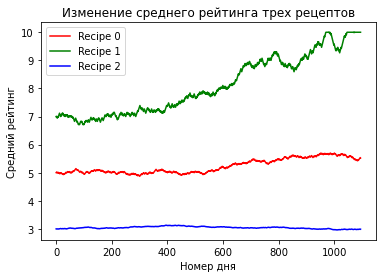

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# загрузка данных из файла
data = np.load('data/average_ratings.npy')

# задание цветов для каждого ряда
colors = ['red', 'green', 'blue']

# построение графика
fig, ax = plt.subplots()
for i in range(3):
    ax.plot(data[i], color=colors[i], label=f"Recipe {i}")

# добавление подписей осей и заголовка
ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")

# добавление легенды
ax.legend()

# отображение графика
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


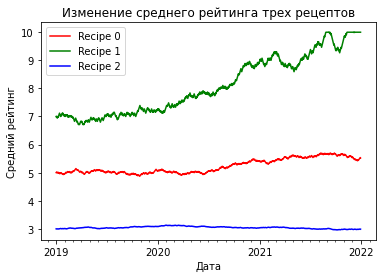

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# загрузка данных из файла
data = np.load('data/average_ratings.npy')

# создание диапазона дат
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)
dates = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# задание цветов для каждого ряда
colors = ['red', 'green', 'blue']

# построение графика
fig, ax = plt.subplots()
for i in range(3):
    ax.plot(dates, data[i], color=colors[i], label=f"Recipe {i}")

# добавление подписей осей и заголовка
ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")

# добавление легенды
ax.legend()

# настройка засечек оси X
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# отображение графика
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

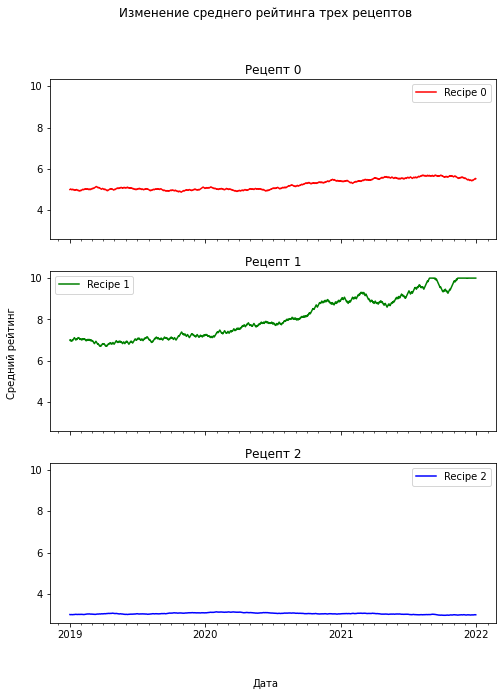

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# загрузка данных из файла
data = np.load('data/average_ratings.npy')

# создание диапазона дат
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)
dates = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# задание цветов для каждого ряда
colors = ['red', 'green', 'blue']

# построение графиков
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 10))
for i in range(3):
    axs[i].plot(dates, data[i], color=colors[i], label=f"Recipe {i}")
    axs[i].set_title(f"Рецепт {i}")
    axs[i].legend()

# добавление подписей осей и заголовка
fig.text(0.5, 0.04, "Дата", ha='center', va='center')
fig.text(0.06, 0.5, "Средний рейтинг", ha='center', va='center', rotation='vertical')
fig.suptitle("Изменение среднего рейтинга трех рецептов")

# настройка засечек оси X
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())

# отображение графиков
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


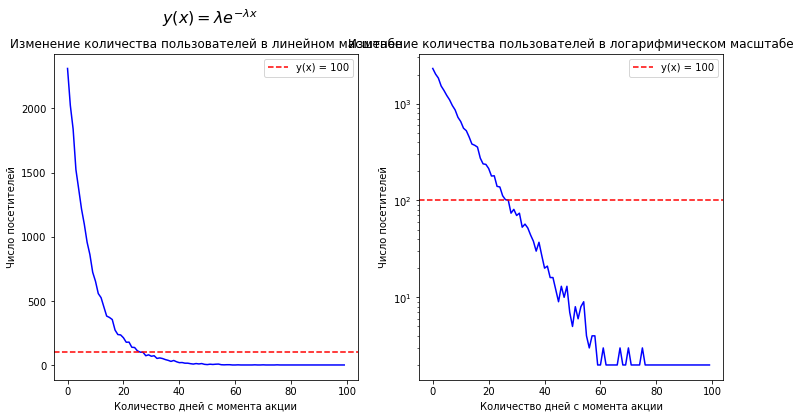

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# загрузка данных из файла
data = np.load('data/visitors.npy')

# подготовка данных для функции
lmbda = 0.02
x = np.arange(0, 100)
y = lmbda * np.exp(-lmbda * x)

# построение линейного графика
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axs[0].plot(data, color='blue')
axs[0].set_xlabel("Количество дней с момента акции")
axs[0].set_ylabel("Число посетителей")
axs[0].set_title("Изменение количества пользователей в линейном масштабе")
axs[0].axhline(y=100, color='red', linestyle='--', label="y(x) = 100")
axs[0].legend()

# построение логарифмического графика
axs[1].semilogy(data, color='blue')
axs[1].set_xlabel("Количество дней с момента акции")
axs[1].set_ylabel("Число посетителей")
axs[1].set_title("Изменение количества пользователей в логарифмическом масштабе")
axs[1].axhline(y=100, color='red', linestyle='--', label="y(x) = 100")
axs[1].legend()

# добавление формулы функции
fig.text(0.25, 0.95, r"$y(x) = \lambda e^{-\lambda x}$", fontsize=16)

# отображение графиков
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# загрузка таблиц из файлов
reviews = pd.read_csv('reviews.csv')
recipes = pd.read_csv('recipes.csv')

# вывод первых 5 строк таблицы reviews
print(reviews.head())

# вывод первых 5 строк таблицы recipes
print(recipes.head())

   Unnamed: 0     user_id  recipe_id        date  rating  \
0      370476       21752      57993  2003-05-01       5   
1      624300      431813     142201  2007-09-16       5   
2      187037      400708     252013  2008-01-10       4   
3      706134  2001852463     404716  2017-12-11       5   
4      312179       95810     129396  2008-03-14       5   

                                              review  
0  Last week whole sides of frozen salmon fillet ...  
1  So simple and so tasty!  I used a yellow capsi...  
2  Very nice breakfast HH, easy to make and yummy...  
3  These are a favorite for the holidays and so e...  
4  Excellent soup!  The tomato flavor is just gre...  
                                       name     id  minutes  contributor_id  \
0     george s at the cove  black bean soup  44123       90           35193   
1        healthy for them  yogurt popsicles  67664       10           91970   
2              i can t believe it s spinach  38798       30            1

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

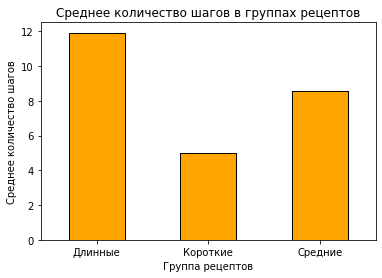

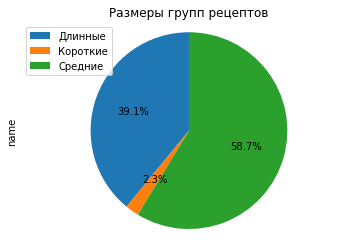

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка таблицы рецептов
recipes = pd.read_csv('recipes.csv')

# Создание нового столбца для группировки по длительности
def categorize_duration(duration):
    if duration < 5:
        return 'Короткие'
    elif duration < 50:
        return 'Средние'
    else:
        return 'Длинные'

recipes['duration_category'] = recipes['minutes'].apply(categorize_duration)

# Группировка рецептов по длительности и расчет среднего количества шагов и размера группы
grouped_recipes = recipes.groupby('duration_category').agg({'n_steps': 'mean', 'name': 'size'})

# Построение столбчатой диаграммы
ax = grouped_recipes['n_steps'].plot(kind='bar', rot=0, color='orange', edgecolor='black')
ax.set_xlabel('Группа рецептов')
ax.set_ylabel('Среднее количество шагов')
ax.set_title('Среднее количество шагов в группах рецептов')

# Построение круговой диаграммы
plt.figure()
grouped_recipes['name'].plot(kind='pie', autopct='%1.1f%%', labels=None, startangle=90)
plt.axis('equal')
plt.legend(labels=grouped_recipes.index, loc='upper left')
plt.title('Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

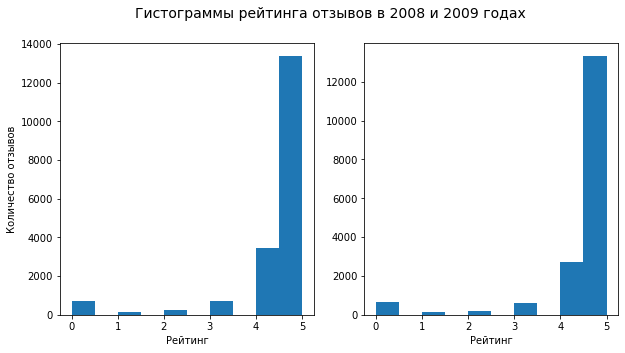

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# загрузка данных
reviews = pd.read_csv("reviews.csv")

# оставляем только отзывы за 2008 и 2009 года
reviews = reviews[pd.to_datetime(reviews['date']).dt.year.isin([2008, 2009])]

# разбиваем отзывы на две группы
reviews['date'] = pd.to_datetime(reviews['date'])
grouped_reviews = reviews.groupby(reviews["date"].dt.year)

# строим гистограммы рейтинга для каждой группы
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
grouped_reviews.get_group(2008)["rating"].plot.hist(ax=ax1, bins=10)
grouped_reviews.get_group(2009)["rating"].plot.hist(ax=ax2, bins=10)

# добавляем общую подпись для рисунка
fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах", fontsize=14)

# настраиваем положение подписей осей
ax1.set_ylabel("Количество отзывов")
ax2.set_ylabel("")  # убираем подпись оси y для правого графика
ax1.set_xlabel("Рейтинг")
ax2.set_xlabel("Рейтинг")

# выводим график на экран
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

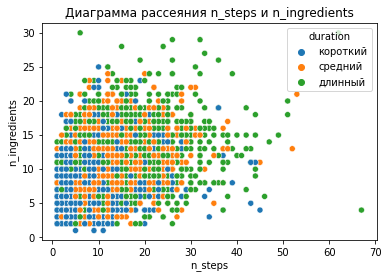

In [11]:
import pandas as pd
import seaborn as sns

# загрузка данных
recipes = pd.read_csv("recipes.csv")

# создание категориальной переменной для длительности рецепта
recipes["duration"] = pd.cut(recipes["minutes"], bins=[0, 30, 60, recipes["minutes"].max()], labels=["короткий", "средний", "длинный"])

# построение диаграммы рассеяния
sns.scatterplot(x="n_steps", y="n_ingredients", hue="duration", data=recipes)
plt.title("Диаграмма рассеяния n_steps и n_ingredients")

# отображение графика
plt.show()

Что касается визуальной линейной зависимости между n_steps и n_ingredients, то она не наблюдается на диаграмме рассеяния. Вместо этого можно заметить, что количество ингредиентов (n_ingredients) может сильно варьироваться при одинаковом количестве шагов (n_steps). Кроме того, можно заметить, что длительность рецепта (duration) может быть связана с количеством шагов и ингредиентов, например, рецепты с большим количеством шагов и ингредиентов могут иметь длинную длительность, в то время как более простые рецепты могут быть короткими или средней длительности.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

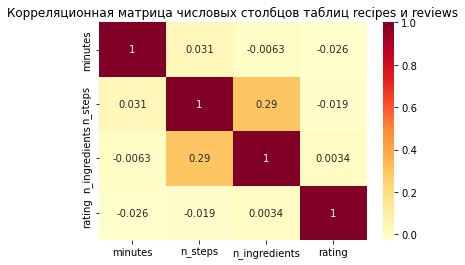

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# загрузка данных
recipes = pd.read_csv("recipes.csv")
reviews = pd.read_csv("reviews.csv")

# объединение таблиц
merged_data = pd.merge(recipes, reviews, left_on="id", right_on="recipe_id")

# выбор числовых столбцов
numerical_columns = ["minutes", "n_steps", "n_ingredients", "rating"]
data = merged_data[numerical_columns]

# создание матрицы корреляции
corr_matrix = data.corr()

# построение тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd")

# добавление заголовка
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")

# отображение графика
plt.show()